# Tarefa analítica de datos CityBikes

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# df_bikes=pd.read_csv('../datasets/stations.csv')
df_bikes=pd.read_csv('../datasets/bicicorunha_data.csv')
df_bikes.drop(columns=['Unnamed: 0'], inplace=True)
df_bikes.head()

,id,name,timestamp,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
0,023efce1bbb332a1b918d56aeb671890,Avenida de Arteixo,2024-12-08T15:42:39.108553Z,8,7,53,1733672393,15,8,0
1,02cecd02915c86d7ab8034b61b19da0e,Mercado de Monte Alto,2024-12-08T15:42:39.108441Z,0,14,43,1733672357,15,0,0
2,030c4027b0bea390e562645c7082db4c,Los Rosales,2024-12-08T15:42:39.108049Z,5,20,11,1733672462,25,3,2
3,0e3aa0134a2f3d07ae5bd093e6af9a33,Plaza de Portugal,2024-12-08T15:42:39.108579Z,7,13,55,1733672439,20,7,0
4,104e0797759d11ac22a61cfed357800b,Ventorrillo,2024-12-08T15:42:39.108261Z,12,7,27,1733672469,19,11,1


#### **1. Elimina rexistros duplicados.**

* Cada canto tempo se tomaron os datos da API?

* Cada canto tempo pensas que se actualizan os datos?

* En que porcentaxe puideches reducir os datos despois de eliminar rexistros duplicados?


In [97]:
#Deleting duplicated registers
original_length=len(df_bikes)
df_bikes= df_bikes.drop_duplicates(keep='first')
current_length=len(df_bikes)


In [101]:
print('Length citybikes before depurations:', original_length)
print('Length citybikes after depurations:', current_length)
print('Porcentage reduction:', (original_length-current_length)/original_length*100)


Length citybikes before depurations: 1333829
Length citybikes after depurations: 890281
Porcentage reduction: 33.25373792292715


In [102]:
#Updates between data
df_bikes['timestamp'] = pd.to_datetime(df_bikes['timestamp'], format='ISO8601')
df_hercules=df_bikes[df_bikes['name']=='Torre de Hércules']
seconds_mean = df_hercules['timestamp'].diff().dt.total_seconds().mean()
print('Data has been updated every: ' + str(round(seconds_mean/60, 2))+' minutes.')

Data has been updated every: 3.0 minutes.


#### **2. Evolución viaxes**
Mostra a evolución ao longo do tempo da dispoñibilidade de bicicletas (gráfico de liña) nunha estación que escollas

In [106]:
df_hercules = df_hercules.set_index('timestamp')

KeyError: "None of ['timestamp'] are in the columns"

#### **3. Evolución entre estacións**

<Axes: xlabel='timestamp', ylabel='free_bikes'>

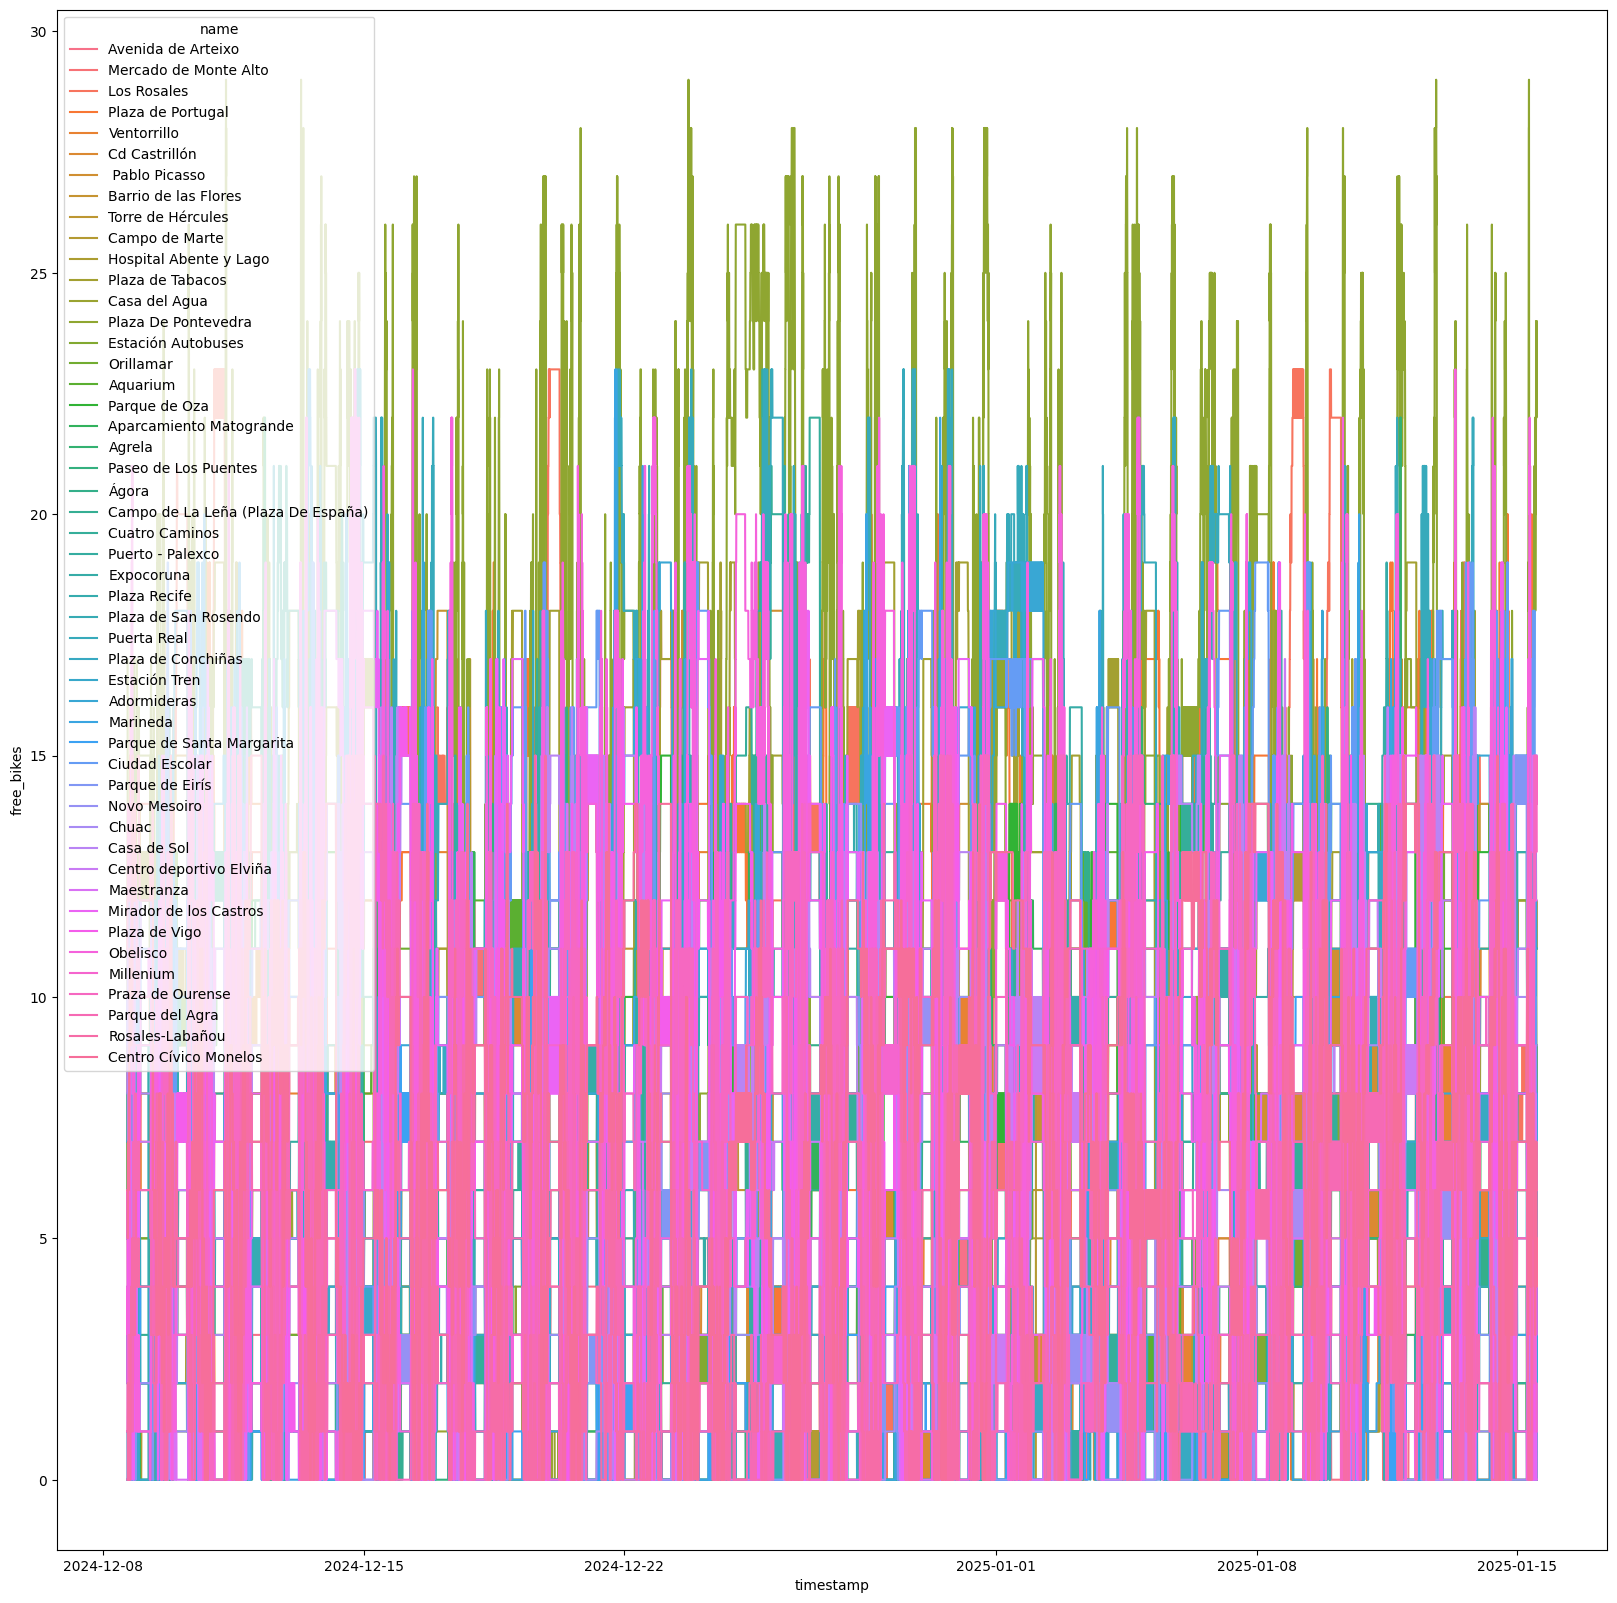

In [125]:
plt.figure(figsize=(20,20))
sns.lineplot(data=df_bikes, x='timestamp', y='free_bikes', hue='name')

<Axes: title={'center': 'Dispoñibilidade bicicletas Torre de Hérculos'}, xlabel='Tempo', ylabel='Bicicletas dispoñibles'>

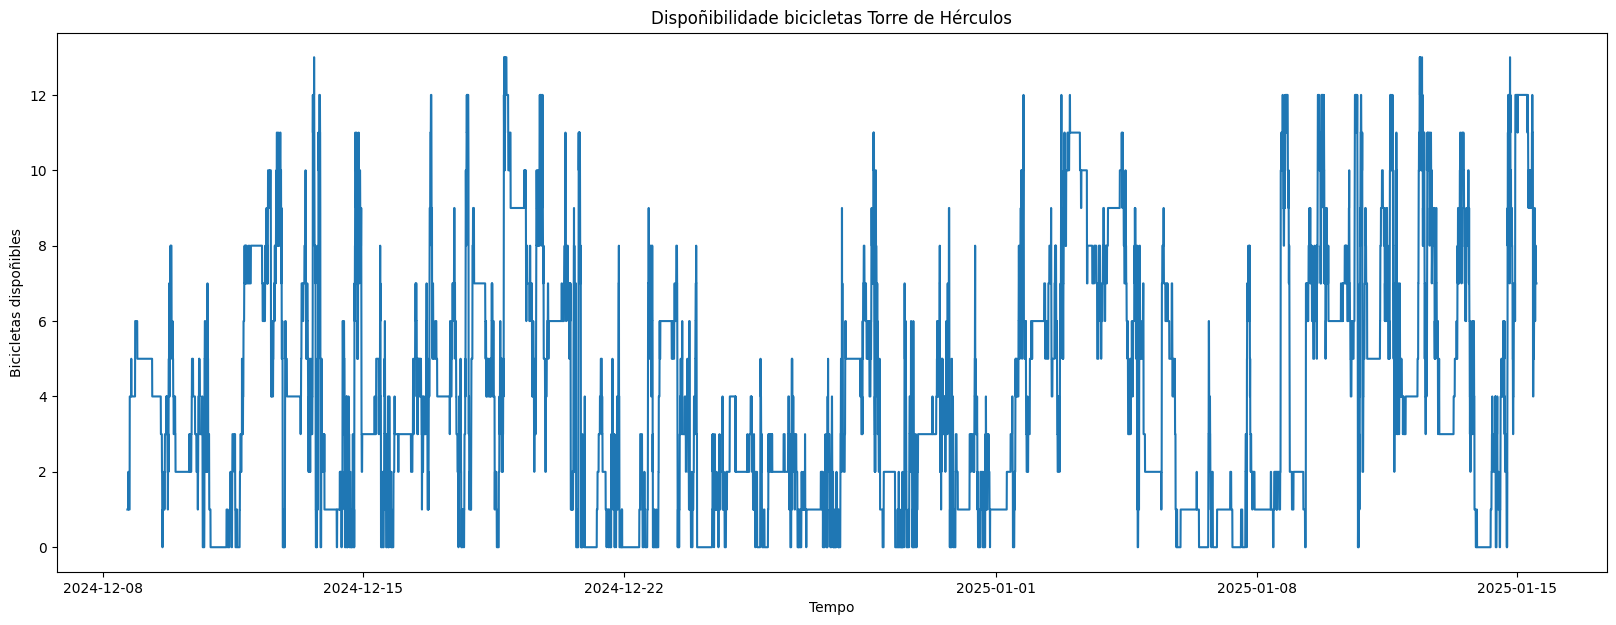

In [108]:
plt.figure(figsize=(20,7))
plt.xlabel("Tempo")  
plt.ylabel("Bicicletas dispoñibles")  
plt.title("Dispoñibilidade bicicletas Torre de Hérculos") 
sns.lineplot(data=df_hercules.free_bikes)



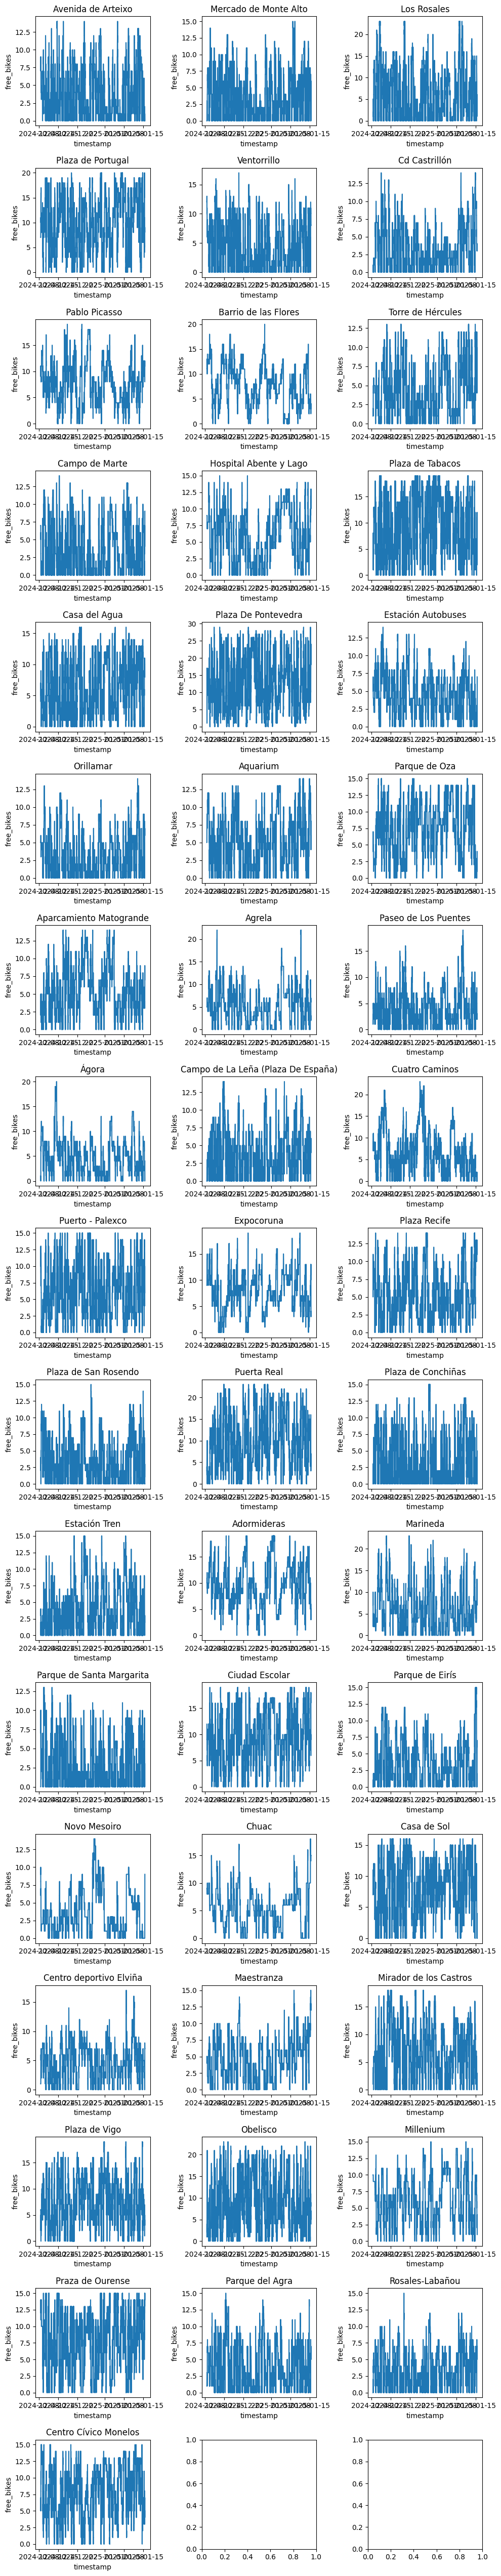

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_stations = df_bikes['name'].unique()
n_rows = int(np.ceil(len(total_stations) / 3))
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for i, station in enumerate(total_stations):
    df_station = df_bikes[df_bikes['name'] == station]
    sns.lineplot(data=df_station, x='timestamp', y='free_bikes', ax=axes[i])
    axes[i].set_title(station)

plt.tight_layout()
plt.show()


#### **4. Eléctricas vs Mecánicas** 
Ver evolución no tempo da dispoñibilidade de bicis segundo o tipo (eléctrica ou mecánica) (area apilada?) de varias estacións da túa elección.

<Axes: xlabel='timestamp', ylabel='normal_bikes'>

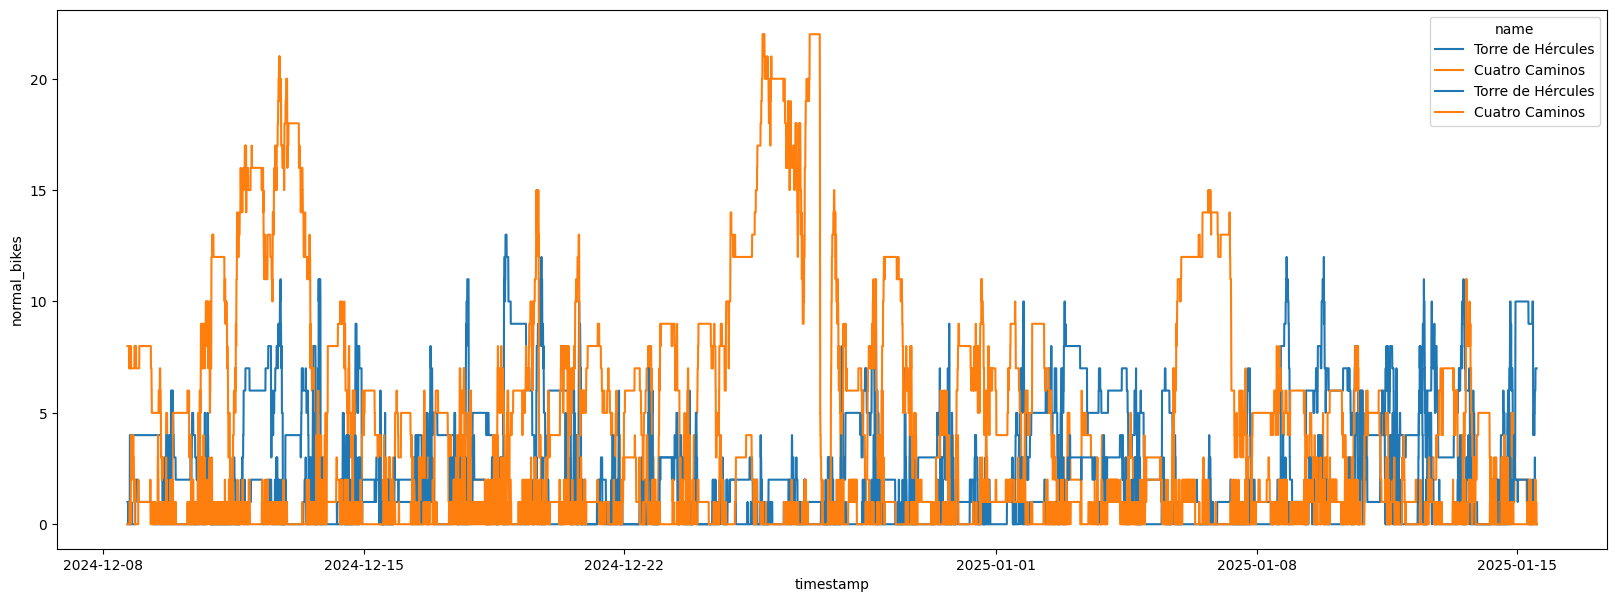

In [133]:
df_some_stations = df_bikes[df_bikes['name'].isin(['Cuatro Caminos', 'Torre de Hércules'])]

plt.figure(figsize=(20,7))
sns.lineplot(data=df_some_stations, x='timestamp', y='normal_bikes', hue='name')
sns.lineplot(data=df_some_stations, x='timestamp', y='ebikes', hue='name')

#### **5. Medias de uso por horas en Cuatro Caminos**
Ver a evolución no tempo da dispoñibilidade de bicis por horas (utilizar medias?). A idea sería respostar á pregunta: en que horas teño maior dispoñibilidade? En que horas é máis difícil coller unha bici nesta estación?

<Axes: xlabel='times', ylabel='free_bikes'>

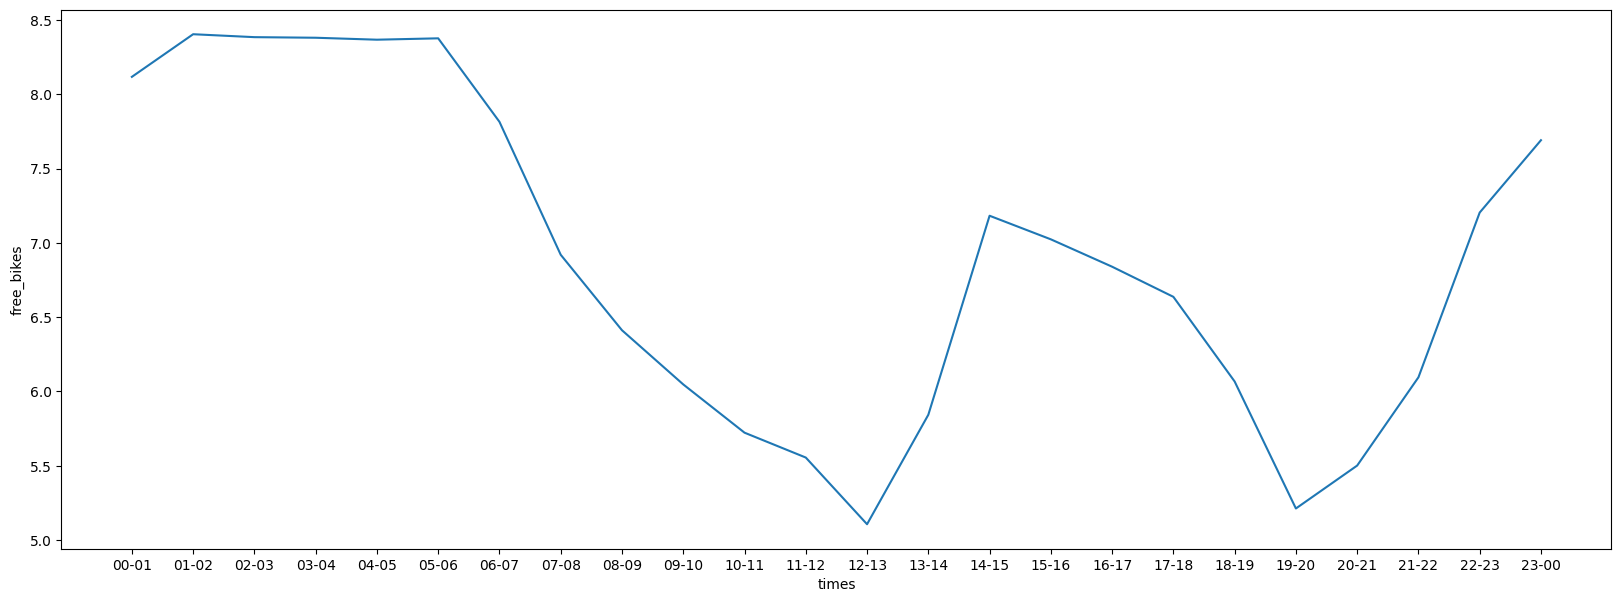

In [188]:

df_4caminos=df_bikes[df_bikes['name']=='Cuatro Caminos']['free_bikes']
# df_4caminos = df_4caminos.set_index('timestamp')

sample=df_4caminos.sample(1)
sample.index.time
sample.sample(1)

time_slots = [
    {'init': '00:00:00', 'end': '01:00:00'},
    {'init': '01:00:00', 'end': '02:00:00'},
    {'init': '02:00:00', 'end': '03:00:00'},
    {'init': '03:00:00', 'end': '04:00:00'},
    {'init': '04:00:00', 'end': '05:00:00'},
    {'init': '05:00:00', 'end': '06:00:00'},
    {'init': '06:00:00', 'end': '07:00:00'},
    {'init': '07:00:00', 'end': '08:00:00'},
    {'init': '08:00:00', 'end': '09:00:00'},
    {'init': '09:00:00', 'end': '10:00:00'},
    {'init': '10:00:00', 'end': '11:00:00'},
    {'init': '11:00:00', 'end': '12:00:00'},
    {'init': '12:00:00', 'end': '13:00:00'},
    {'init': '13:00:00', 'end': '14:00:00'},
    {'init': '14:00:00', 'end': '15:00:00'},
    {'init': '15:00:00', 'end': '16:00:00'},
    {'init': '16:00:00', 'end': '17:00:00'},
    {'init': '17:00:00', 'end': '18:00:00'},
    {'init': '18:00:00', 'end': '19:00:00'},
    {'init': '19:00:00', 'end': '20:00:00'},
    {'init': '20:00:00', 'end': '21:00:00'},
    {'init': '21:00:00', 'end': '22:00:00'},
    {'init': '22:00:00', 'end': '23:00:00'},
    {'init': '23:00:00', 'end': '00:00:00'}
]

df_times=pd.DataFrame(columns=['times', 'free_bikes'])

for slot in time_slots:
    grouped_by_time=df_4caminos.between_time(slot['init'], slot['end'])
    grouped_by_day = grouped_by_time.groupby(grouped_by_time.index.date).mean()
    mean_all_days = grouped_by_day.to_frame()['free_bikes'].mean()
    formated_date=slot['init'][:2]+'-'+slot['end'][:2]
    df_times.loc[len(df_times)]=[formated_date, mean_all_days]
plt.figure(figsize=(20,7))

sns.lineplot(data=df_times, x='times', y='free_bikes')

#### **6. Viaxes por día**
Visualiza a cantidade de viaxes por día.

In [197]:
df_by_day= df_bikes[df_bikes.index.date==pd.to_datetime('2024-12-31').date()]

df_trips=pd.DataFrame(columns=['name', 'trips'])
stations_names=df_bikes['name'].unique()
for station in stations_names:
    bike_data=df_by_day[df_by_day['name']==station]['free_bikes'].to_numpy()
    precedent=0
    trips=0
    for bike in bike_data:
        if precedent>bike:
            trips+=precedent-bike
        precedent=bike
    df_trips.loc[len(df_trips)]=[station, trips]
df_trips['trips'].sum()
df_trips.head()

print(df_bikes.sample(1).index.day_name()[0])

Wednesday


In [189]:
# sns.lineplot(data=df_trips, x='name', y='trips')

#### **7. Viaxes por día según tipo de bicicleta**
Visualiza a cantidade de viaxes por día, en función do tipo de bicicleta.


#### **8. Viaxes por día según tipo de bicicleta**
Dependendo número de viaxes por día co tempo atmosférico (cruzar con datos de Metostat)
https://meteostat.net/es/place/es/a-coruna?s=08001&t=2025-01-17/2025-01-24

